In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [69]:
walmart = pd.read_csv("../../../Data & Script/tommywilczek-walmart/walmart.csv", index_col=0)

### Features to Study

Categorical
- IsHoliday: True/False If a holiday is celebrated in one or more days in the week
- Type: Three types of stores ‘A’, ‘B’ or ‘C’

Continous

- CPI: Consumer Price Index during that week.
- UnEmployement: The unemployment rate during that week in the region of the store.
- Temperature: Averge temeperature in that week
- Fuel Price:  Fuel Price in that region during that week.
- Size : Sets the size of a Store would be calculated by the no. of products available in the particular store ranging from 34,000 to 210,000.

Outcome
- Weekly Sales: Averge sales in the week

### Exploring the data: Univariate

*       How many variables do I have?
*       How many datapoints?
*       Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
*       Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
*       Do I have missing data? If so, how much?
*    How much variance is there in each of my variables?

In [70]:
# all columns of the dataset
print("Features", walmart.columns)

# number of datapoints
print("Number of data points: ", len(walmart))

Features Index(['Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')
Number of data points:  423325


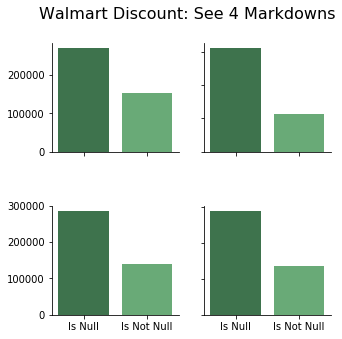

In [71]:
#Amount of nulls

#walmart.fillna({'MarkDown1':0, 'MarkDown2':0,'MarkDown3':0,'MarkDown4':0,'MarkDown5':0}, inplace=True)

fig = plt.figure(figsize=(5,5))
# title of the figure
fig.suptitle('Walmart Discount: See 4 Markdowns', fontsize = 16)
# adjust horizontal and vertical spacing
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)
i = 1
for column in walmart.columns[7 : 7+4]:
    walmart[column + "_null?"] = np.where(walmart[column].isnull(), 'Is Null', 'Is Not Null')
    fig.add_subplot(220 + i)
    ax = sns.countplot(x=column + '_null?', data=walmart, palette="Greens_d")
    sns.despine()
    if(i % 2 == 0):
        ax.set_yticklabels([])
    if(i <= 2):
        ax.set_xticklabels([])

    ax.set(xlabel='', ylabel='')
    #plt.title(i)
    i += 1

#### Features to Study

Categorical
- Store: The store number. Range from 1-45.
- IsHoliday: True/False If a holiday is celebrated in one or more days in the week
- Dept: One of 1-99 that shows the department.

Continous

- Date: The date of the week where this observation was taken . -Weekly_Sales: The sales recorded during that Week.
- Temperature: Averge temeperature in that week
- Fuel Price:  Fuel Price in that region during that week.
- CPI: Consumer Price Index during that week.
- UnEmployement: The unemployment rate during that week in the region of the store.
Outcome
- Weekly Sales: Averge sales in the week

In [72]:
walmart.columns

Index(['Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'MarkDown1_null?',
       'MarkDown2_null?', 'MarkDown3_null?', 'MarkDown4_null?'],
      dtype='object')

In [73]:
# Check Nulls for the four categorical attributes
num_of_rows = walmart.shape[0]
print("There are ", num_of_rows, " rows\n")
nulls_count = walmart[['Store', 'IsHoliday', 'Dept', 'Type']].isnull().sum()
print(nulls_count)

There are  423325  rows

Store           0
IsHoliday       0
Dept         1755
Type            0
dtype: int64


In [74]:
# Check Nulls for the five continous attributes
cont_features = ['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

nulls_count = walmart[cont_features].isnull().sum()
print(nulls_count)
# how much do they vary
walmart[cont_features].describe()

Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
dtype: int64


,Temperature,Fuel_Price,CPI,Unemployment
count,423325.000000,423325.000000,422740.000000,422740.000000
mean,60.067140,3.361933,171.218863,7.957296
std,18.452599,0.458038,39.167088,1.863433
min,-7.290000,2.472000,126.064000,3.684000
25%,46.670000,2.935000,132.022667,6.891000
50%,62.070000,3.452000,182.350989,7.866000
75%,74.260000,3.738000,212.512605,8.567000
max,101.950000,4.468000,228.976456,14.313000


In [75]:
# Check Nulls for outcome variable
nulls_count = walmart['Weekly_Sales'].isnull().sum()
print(nulls_count)

1755


In [76]:
# Two numbers are same , the number of null weekly sales and number of null departments
# CPI nulls and Unemployment nulls are also the same

# I assert that all missing weekly sales data have no matching department data
assert(walmart[(walmart['Weekly_Sales'].isnull()) & (walmart['Dept'].isnull())].shape[0] == 1755)

# I assert that all missing CPI has no matching Unemployment
assert(walmart[(walmart['CPI'].isnull()) & (walmart['Unemployment'].isnull())].shape[0] == 585)

nulls = 1755 + 585
not_nulls = num_of_rows - (1755 + 585)
print("Null to NotNull ratio", nulls/num_of_rows , ":", not_nulls/num_of_rows)

# Ratio is very small
walmart = walmart.dropna()

Null to NotNull ratio 0.005527667867477706 : 0.9944723321325223


### Exploring Multivariate Relationships

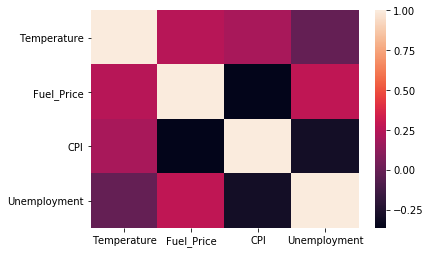

              Temperature  Fuel_Price       CPI  Unemployment
Temperature      1.000000    0.250824  0.201037     -0.009300
Fuel_Price       0.250824    1.000000 -0.365318      0.276568
CPI              0.201037   -0.365318  1.000000     -0.291317
Unemployment    -0.009300    0.276568 -0.291317      1.000000


In [77]:
cont_df = walmart[cont_features]
corr_mat = cont_df.corr()
sns.heatmap(corr_mat)
plt.show()
print(corr_mat)

The darker color shows that the following are slightly correlated
*  CPI and UnEmployment(- 0.300008)
*  CPI and Temperature(0.181789)

The following are very slightly correlated

*  CPI and Fuel Price (-0.164460)
*  Temperature and Fuel Price(0.142966)

The other 16 combinations are all zero

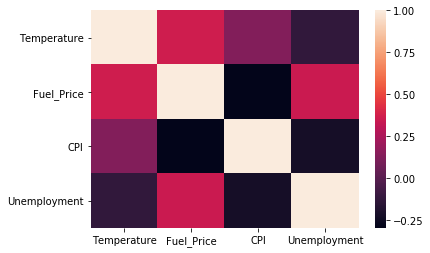

              Temperature  Fuel_Price       CPI  Unemployment
Temperature      1.000000    0.363005  0.132412     -0.123726
Fuel_Price       0.363005    1.000000 -0.294335      0.348735
CPI              0.132412   -0.294335  1.000000     -0.218525
Unemployment    -0.123726    0.348735 -0.218525      1.000000


In [78]:
#Let me try to see correlation of the variables with only the first 15 stores
walmart_store_15 = walmart.loc[walmart['Store'] < 15].loc[:,cont_features]
corr_mat = walmart_store_15.corr()
sns.heatmap(corr_mat)
plt.show()
print(corr_mat)

- CPI and UnEmployment(-0.411763) Increased

- CPI and Temperature(0.0988) Decreased to 0

- CPI and Fuel Price(-0.128230) --Decreased 

- Temperature and Fuel Price(0.214964) --Increased

The same, four attributes are involved: CPI, UnEmployment, Temperature, Fuel Price

I want to see how the four correlations look like If I plot the sampling distrbution of correlations.

In [79]:
corr_mat.loc['Temperature', 'Fuel_Price']

0.3630053990731591

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


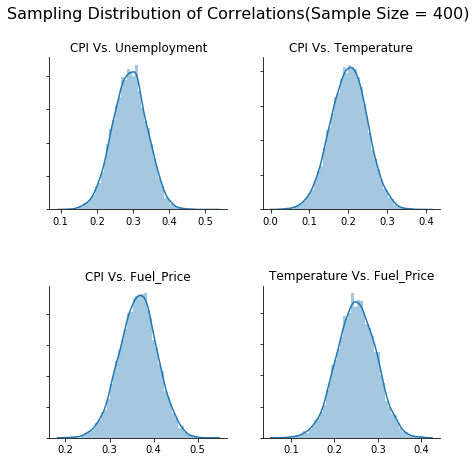

In [80]:
# let sample size be 15
corr_dist = {1:[],2:[],3:[],4:[]}
to_check = [['CPI', 'Unemployment'], ['CPI', 'Temperature'],['CPI', 'Fuel_Price'],['Temperature', 'Fuel_Price']]
# I 
for i in range(10000):
    # Ideal sample size for 95% confidence interval
    corr_mat = walmart.sample(400).loc[:,cont_features].corr()
    corr_dist[1].append(abs(corr_mat.loc[to_check[0][0], to_check[0][1]]))
    corr_dist[2].append(abs(corr_mat.loc[to_check[1][0], to_check[1][1]]))
    corr_dist[3].append(abs(corr_mat.loc[to_check[2][0], to_check[2][1]]))
    corr_dist[4].append(abs(corr_mat.loc[to_check[3][0], to_check[3][1]]))

fig = plt.figure(figsize=(7,7))
fig.suptitle('Sampling Distribution of Correlations(Sample Size = 400)', fontsize = 16)
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)
for i in range(4):
    fig.add_subplot(220 + i + 1)
    ax = sns.distplot(corr_dist[i + 1])
    ax.set_title(to_check[i][0] + " Vs. " + to_check[i][1])
    ax.set_yticklabels([])
    sns.despine(left=False)

The above graph shows that on average, the absolute value of correlations is ranked like this:

1. CPI vs Fuel Price ( between 0.3 and 0.4)
2. CPI vs. Unemployment(around 0.3)
3. Temperature and Fuel Price(between 0.2 and 0.3)
4. CPI vs. Temperature(around 0.2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


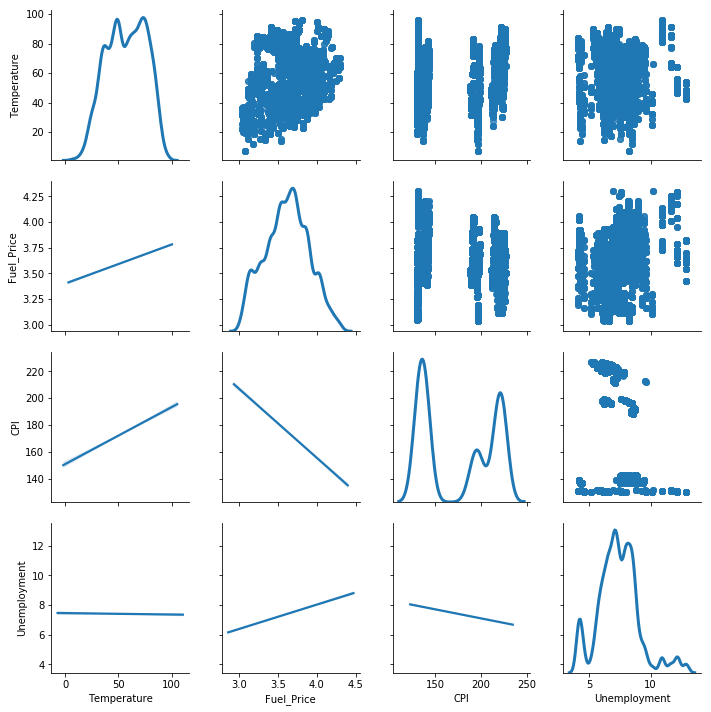

In [81]:
# I took a sample of 10000 elements from the whole dataset
g = sns.PairGrid(cont_df.sample(10000), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#### One Hot Encoding
Most machine learning models don't like categorical attributes therefore I created a one hot encoding for Type column 

In [82]:
features = pd.get_dummies(walmart.Type)
features.sample(5)

,A,B,C
245454,0,1,0
330136,1,0,0
38267,1,0,0
286288,0,1,0
166632,0,1,0


#### Fixing Non-Normal Features

CPI is bimodal and it is not normally distributed, UnEmployment is not good looking as well.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


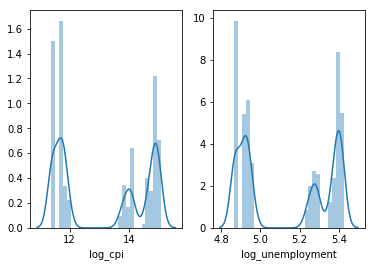

In [83]:
features['log_cpi'] = np.sqrt(walmart['CPI']) 
features['log_unemployment'] = np.log(walmart['CPI']) 

fig = plt.figure(figsize=(6,4))
fig.add_subplot(121)
sns.distplot(features['log_cpi'])
fig.add_subplot(122)
sns.distplot(features['log_unemployment'])
plt.show()

#### Rescaling Data Using Min-Max Normalization/ Z Score Normalization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


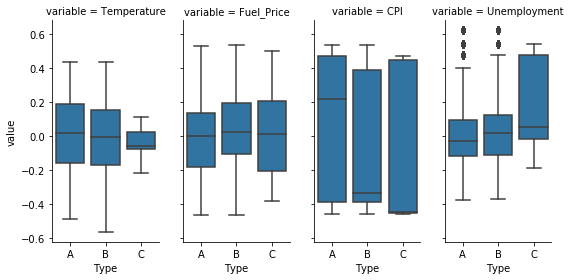

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


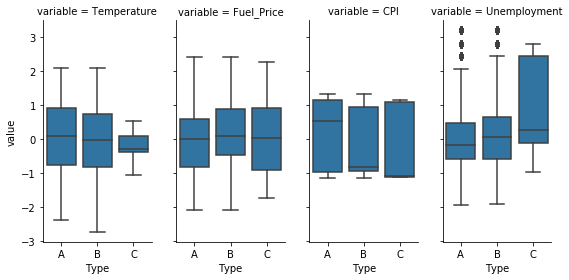

In [84]:
from sklearn import preprocessing
# descard Type column
walmart_cont = walmart.loc[:, cont_features[1:]]
# rescaling data ( Min Max Normalization)
walmart_normalized1 = (walmart_cont - walmart_cont.mean()) / (walmart_cont.max() - walmart_cont.min())
# It took me an hour to figure out a problem about index 
walmart_normalized2 = pd.DataFrame(preprocessing.scale(walmart_cont), columns=cont_features[1:],index=walmart_cont.index)

type_attrib = walmart.loc[:, 'Type']

# add attribute Type
walmart_normalized1['Type'] = pd.Series(type_attrib)
walmart_normalized2['Type'] = pd.Series(type_attrib)

walmart_melted1 = pd.melt(walmart_normalized1, id_vars=['Type'])
walmart_melted2 = pd.melt(walmart_normalized2, id_vars=['Type'])

g = sns.FacetGrid(walmart_melted1, col="variable", height=4, aspect=.5)
g = g.map(sns.boxplot, "Type", "value")
plt.show()

g = sns.FacetGrid(walmart_melted2, col="variable", height=4, aspect=.5)
g = g.map(sns.boxplot, "Type", "value")
plt.show()

The plot shows that there are some outliers for UnEmployment in store types A and B. The range of temperatures for Type C stores is small. Fuel Price is similar to all types.CPI values are close to eachother and vary a lot. Minmax normalized data varies a lot

#### More features

To capture non-linearity while keeping the model happy, it can be helpful to create quadratic or higher-level features by squaring, cubing, or otherwise multiplying a variable by itself.

In [85]:
features['square_fuel_price'] = np.square(walmart_normalized2['Fuel_Price'])
features['square_unemployment'] = np.square(walmart_normalized2['Unemployment'])
features.columns

Index(['A', 'B', 'C', 'log_cpi', 'log_unemployment', 'square_fuel_price',
       'square_unemployment'],
      dtype='object')

#### PCA

In [98]:
X = walmart_normalized1.loc[:, cont_features[1:]]
X.sample(10)

,Temperature,Fuel_Price,CPI,Unemployment
204877,-0.122197,-0.399170,0.454975,0.002998
285543,-0.030168,0.212641,-0.381726,0.178534
392602,-0.175787,0.052798,0.251519,-0.138384
147835,0.146316,0.270908,-0.376270,0.088327
136434,0.023761,0.221302,0.162205,0.114538
28288,0.274750,-0.131454,0.519289,-0.085167
38303,0.227492,-0.053501,-0.449886,-0.352499
237187,0.205559,0.192168,-0.376701,0.174563
226900,0.155700,0.120515,-0.376701,-0.369747
104898,-0.005182,-0.351926,0.487473,-0.024688


In [99]:
# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
Cx

array([[ 0.04263669,  0.01141879,  0.01693106, -0.00037223],
       [ 0.01141879,  0.04860929, -0.03285084,  0.0118197 ],
       [ 0.01693106, -0.03285084,  0.1663531 , -0.02303174],
       [-0.00037223,  0.0118197 , -0.02303174,  0.03757427]])

In [104]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.09678529]
 [-0.24326418]
 [ 0.94946295]
 [-0.17313362]]
Eigenvalue 1: 0.18069560942840163
----------------------------------------
Eigenvector 2: 
[[0.68880098]
 [0.67424416]
 [0.1434595 ]
 [0.22442683]]
Eigenvalue 2: 0.05721918342107776
----------------------------------------
Eigenvector 3: 
[[ 0.61299225]
 [-0.69628276]
 [-0.18136379]
 [ 0.32640159]]
Eigenvalue 3: 0.024458826338780475
----------------------------------------
Eigenvector 4: 
[[-0.37473499]
 [ 0.03751906]
 [ 0.21224197]
 [ 0.90173131]]
Eigenvalue 4: 0.03279973906204774
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.61216775 0.19384942 0.08286258 0.11112026]


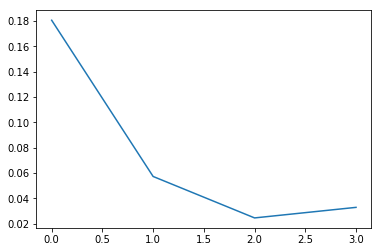

array([0.18069561, 0.05721918, 0.02445883, 0.03279974])

In [117]:
plt.plot(eig_val_cov)
plt.show()

In [111]:
P = eig_vec_cov[:, 0]
P.shape

(4,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


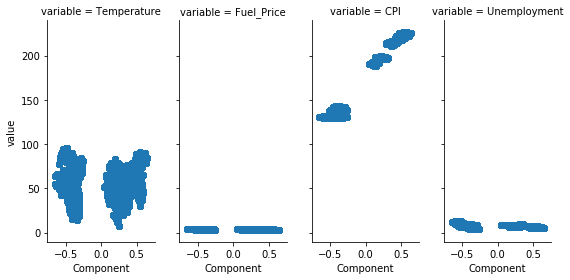

In [116]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
# the first eigen vector
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
# unnormalized data
data_to_plot = cont_df.iloc[:,1:]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    fit_reg=False
)
plt.show()

The PCA failed, because I could not find any PCA above one